In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! apt-get install -y fonts-noto-cjk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 55.7 MB of archives.
After this operation, 92.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 fonts-noto-cjk all 1:20190409+repack1-0ubuntu0.18.04 [55.7 MB]
Fetched 55.7 MB in 4s (13.6 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20190409+repack1-0ubuntu0.18.04_all.deb ...
Unpacking fonts-noto-cjk (1:20190409+repack1-0ubuntu0.18.04) ...
Setting up fonts-noto-cjk (1:20190409+repack1-0ubuntu0.18.04) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Path = '/content/drive/MyDrive/Colab Notebooks/google_trends'
filelist = os.listdir(Path)

In [20]:
# Create a long-form dataframe with the trends for the Top 10 searches
df = pd.DataFrame()
for sheet in range(10):
    column_name = pd.read_csv(f'{Path}/{filelist[sheet]}').values[0]
    temp_df = pd.read_csv(f'{Path}/{filelist[sheet]}')
    temp_df['trend'] = [column_name] * 50
    df = pd.concat([df, temp_df])

In [21]:
# Replace Japanese with English
# First, clean up the English filenames
trend_list = [x.replace('_', ' ') for x in filelist]
trend_list = [x.replace('.csv','') for x in trend_list]
trend_list = [x[2::] for x in trend_list]
trend_list

# Create a dictionary pairing each Japanese word with its English translation
translation = {
    '小山田 圭吾: (Japan)': 'Keigo Oyamada',
    '夏目 三 久: (Japan)': 'Natsume Miku',
    '小松菜 奈: (Japan)': 'Nana Komatsu',
    'コロナ ワクチン: (Japan)': 'New coronavirus vaccine',
    'モンハン ライズ: (Japan)': 'Monster Hunter Rise',
    '呪術 廻 戦: (Japan)': 'Jujutsu Kaisen',
    'オリンピック: (Japan)': 'Tokyo 2020 Olympics',
    '東京リベンジャー ズ: (Japan)': 'Tokyo Revengers',
    'ウマ 娘: (Japan)': 'Uma Musume Pretty Derby',
    '大谷 翔平: (Japan)': 'Shohei Ohtani'
}

j_translation = {
    'Keigo Oyamada': '小山田 圭吾',
    'Natsume Miku': '夏目 三 久',
    'Nana Komatsu': '小松菜 奈' ,
    'New coronavirus vaccine': 'コロナ ワクチン',
    'Monster Hunter Rise': 'モンハン ライズ',
    'Jujutsu Kaisen': '呪術 廻 戦',
    'Tokyo 2020 Olympics': 'オリンピック',
    'Tokyo Revengers': '東京リベンジャー ズ',
    'Uma Musume Pretty Derby': 'ウマ 娘',
    'Shohei Ohtani': '大谷 翔平'
}

# Replace values
df['trend'] = df['trend'].replace(translation)
df['japanese'] = df['trend'].replace(j_translation)

In [22]:
# Sort trends in descending order
rank_dict = {
    'Keigo Oyamada': 10,
    'Natsume Miku': 9,
    'Nana Komatsu': 8,
    'New coronavirus vaccine': 7,
    'Monster Hunter Rise': 4,
    'Jujutsu Kaisen': 5,
    'Tokyo 2020 Olympics': 1,
    'Tokyo Revengers': 3,
    'Uma Musume Pretty Derby': 6,
    'Shohei Ohtani': 2
}
df['rank'] = df['trend'].replace(rank_dict)

In [23]:
# Clean up data and add columns necessary for visualization
df = df.drop('Week', axis=0)
df['time'] = pd.to_datetime(df.index)
df['value'] = df['Category: All categories']
df = df.drop('Category: All categories', axis=1)
df['value'] = df['value'].apply(lambda x: int(x.replace('<1', '0')))
df = df.sort_values(by=['rank', 'time'], ascending=[True, True])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
df.head()

,trend,japanese,rank,time,value
2021-01-03,Tokyo 2020 Olympics,オリンピック,1,2021-01-03,1
2021-01-10,Tokyo 2020 Olympics,オリンピック,1,2021-01-10,1
2021-01-17,Tokyo 2020 Olympics,オリンピック,1,2021-01-17,1
2021-01-24,Tokyo 2020 Olympics,オリンピック,1,2021-01-24,1
2021-01-31,Tokyo 2020 Olympics,オリンピック,1,2021-01-31,1


In [ ]:
# kde_df = pd.DataFrame()
# for obs in range(490):
#     value = df.iloc[obs]['value']
#     for i in range(value):
#         kde_df = kde_df.append(df.iloc[obs])
# kde_df.shape

(11703, 3)

In [25]:
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

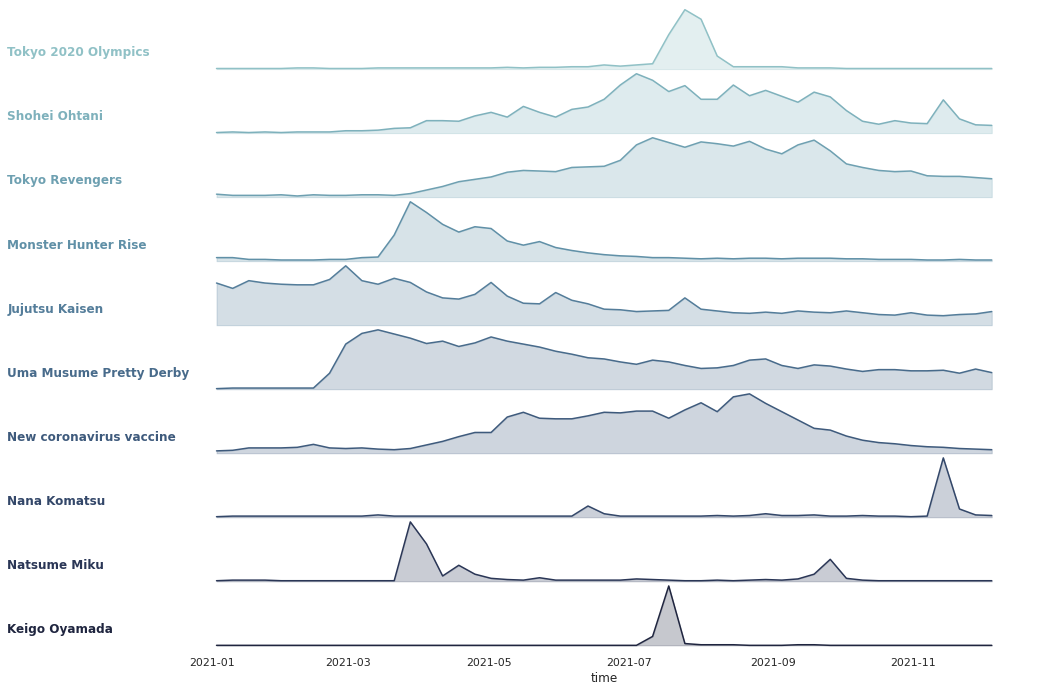

In [26]:
g = sns.FacetGrid(df, row="trend", hue="trend", aspect=15, height=1, palette=pal)
g.map(plt.plot, "time", "value")
g.map(plt.fill_between, "time", "value", alpha=0.25)

def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.2, .3, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "time")
g.figure.subplots_adjust(hspace=-.02)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)